<center> <h1> Finansal Veri Analizi, Tahmini ve İlişkili Hisselerin Belirlenmesi
</h1>
</center>

---
<br>

# Proje Amacı :
Bu proje, İstanbul Borsası'nda işlem gören hisse senetlerinin finansal verilerini analiz etmeyi, gelecekteki fiyatlarını tahmin etmeyi ve bu hisseler arasındaki ilişkileri belirlemeyi amaçlamaktadır. Finansal veri analizi makine öğrenimi ve derin öğrenme tekniklerini kullanarak, hisse senetlerinin fiyat hareketlerini anlamak ve yatırım kararlarını desteklemek hedeflenmektedir. Ayrıca, hisseler arasındaki korelasyonları inceleyerek, birbiriyle ilişkili hisseleri tespit etmek ve yatırımcılara çeşitlendirme stratejileri için rehberlik etmek planlanmaktadır.

<br>

<h3>Kullanılacak İndikatörler :</h3>

- <strong>RSI(Relative Strength Index)</strong>

- <strong>Ichimoku Bulutu</strong>

- <strong>SMA(Simple Moving Average)</strong>

- <strong>Bollinger Bantları</strong>

- <strong>MACD (Moving Average Convergence Divergence)</strong>

<br>

<h3>Proje Adımları :</h3>

<ol>
  <li>Veri setinin eklenmesi.</li>
  <li>Verinin İncelenmesi.</li>
  <li>Günlük fiyat değişimlerinin standart sapmasının bulunması</li>
  <li>Kapanış Fiyat değerlerinin görselleştirilmesi</li>
  <li>SMA İndikatörünün hesaplanması ve görselleştirilmesi</li>
  <li>RSI İndikatörünün hesaplanması ve görselleştirilmesi</li>
  <li>Bollinger Bantlarının hesaplanması ve görselleştirilmesi</li>
  <li>Ichimoku Bulutu'nun hesaplanması ve görselleştirilmesi</li>
  <li>MACD İndikatörünün hesaplanması</li>
  <li>Derin öğrenme modelinin oluşturulması.</li>
  <li>Modelin gerçek verilerle test edilmesi.</li>
  <li>Modelin yılsonu fiyatlandırması için tahminde bulunması</li>
  <li>Kolere ve ters kolere hisselerin bulunması</li>
  <li>Kolere/Ters Kolere hisselerin graflar ile görselleştirilmesi</li>
  <li>Modeldeki muhtemel sapma unsurunun bulunması ve görselleştirilmesi.</li>
</ol>


<br>



In [594]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

# Verinin İncelenmesi

In [595]:
# Örnek Bir Veri İle Çalışma
start = "2014-01-01"
veri = yf.download(["SISE.IS"],start = start)

[*********************100%%**********************]  1 of 1 completed


In [596]:
veri.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,1.899165,1.899165,1.899165,1.899165,1.486916,0
2014-01-02,1.885201,1.913130,1.857272,1.913130,1.497850,891178
2014-01-03,1.878219,1.878219,1.843307,1.857272,1.454117,2492809
2014-01-06,1.871236,1.913130,1.857272,1.906147,1.492382,1992739
2014-01-07,1.941059,1.968987,1.934076,1.941059,1.519716,1902086


In [597]:
veri.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-14,52.349998,54.049999,51.650002,52.849998,52.849998,39976512
2024-05-15,52.849998,52.849998,51.450001,51.650002,51.650002,30521993
2024-05-16,51.849998,52.400002,51.500000,52.250000,52.250000,25886568
2024-05-17,52.500000,53.599998,52.450001,53.250000,53.250000,41232617
2024-05-20,53.400002,54.650002,53.299999,53.900002,53.900002,44048017


In [598]:
veri.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [599]:
veri.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2.660000e+03
mean,11.839211,12.033331,11.655210,11.831584,11.374576,4.078311e+07
std,15.166224,15.426715,14.917797,15.143486,15.240192,6.428347e+07
min,1.480232,1.501178,1.452303,1.473249,1.153453,0.000000e+00
25%,3.038500,3.067000,2.997722,3.040000,2.507936,4.072528e+06
50%,4.980000,5.060000,4.910000,4.980000,4.426312,8.204404e+06
75%,8.492500,8.622500,8.380000,8.532500,8.231049,5.977704e+07
max,56.799999,57.450001,55.650002,56.599998,56.599998,6.764248e+08


# Günlük kapanış farklarının incelenmesi ve standart sapmanın bulunması.

---

**Standar Sapma neden önemlidir ?**
 - Standart sapma fiyat oynaklığını yani volaliteyi ölçebilmek için önemlidir.
 - Standart sapma, fiyat hareketlerinin ne kadar değişken olduğunu göstererek, fiyat tahminlerinin güvenilirliğini değerlendirmeye yardımcı olabilir.

**Volalite Nedir ?**
- Volatilite, fiyat tahmini yaparken kullanılan bir faktördür. Yüksek volatilite, fiyatların belirsizliğini artırır ve bu da gelecekteki fiyatları tahmin etmeyi zorlaştırır.

In [600]:
fark = veri["Close"].diff()

In [601]:
fark.head()

Date
2014-01-01         NaN
2014-01-02    0.013965
2014-01-03   -0.055858
2014-01-06    0.048875
2014-01-07    0.034912
Name: Close, dtype: float64

In [602]:
std = fark.std()

In [603]:
print("Standart Sapma :", std)

Standart Sapma : 0.4987410885245897


<br>

# Kapanış Fiyatının Görselleştirilmesi

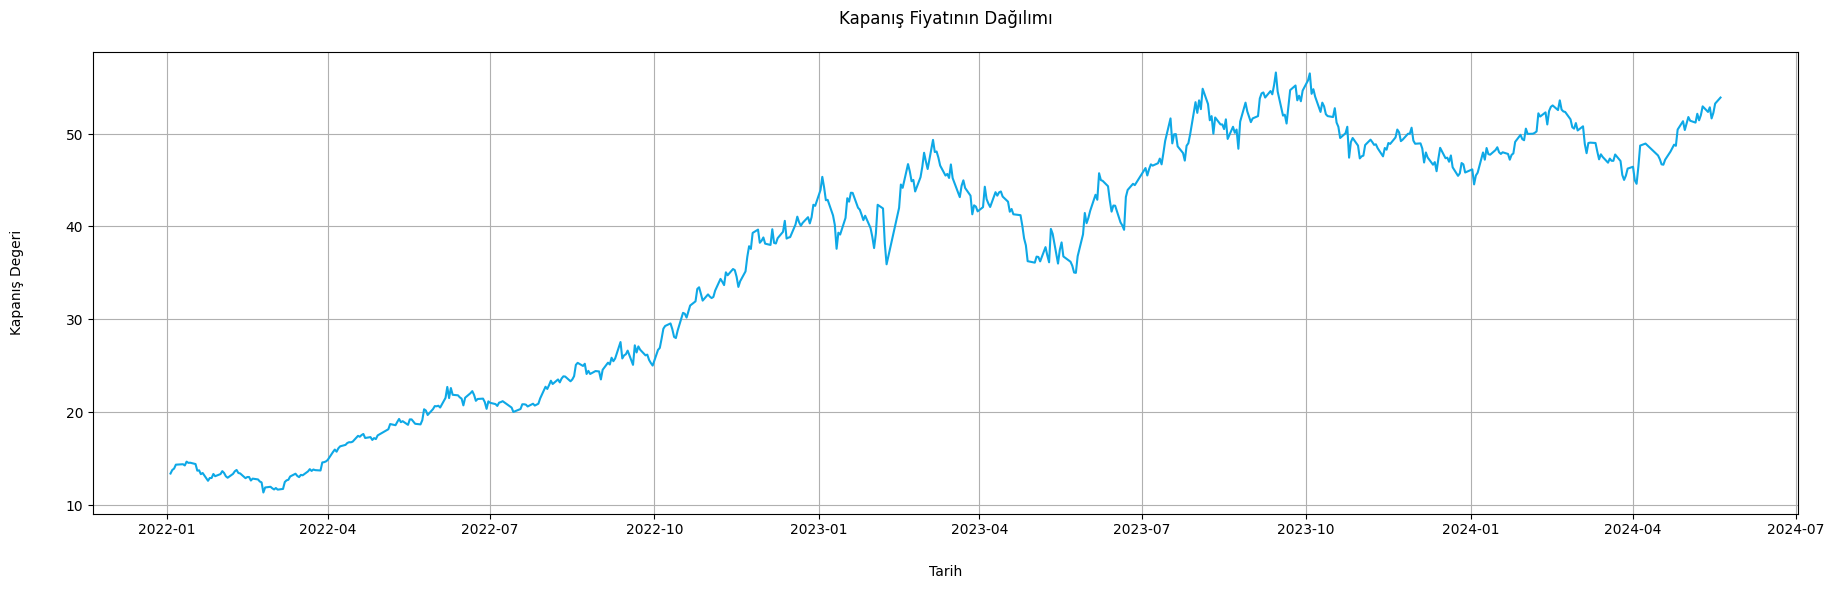

In [604]:
adj_close = veri["Adj Close"].loc["2022-01-01":]

plt.figure(figsize=(22,6))
plt.plot((adj_close),"#0ea8e6")
plt.xlabel("Tarih",labelpad=20)
plt.ylabel("Kapanış Degeri", labelpad=30)
plt.title("Kapanış Fiyatının Dağılımı",pad=20)
plt.grid()

# SMA(Simple Moving Average) İndikatörü


---


**Basit Hareketli Ortalama (SMA) Nedir?**

 Basit Hareketli Ortalama (SMA), finansal analizde sıkça kullanılan bir tekniktir. SMA, belirli bir zaman dilimi içindeki fiyatların ortalamasını alarak, fiyatların düzgünleştirilmiş bir gösterimini sağlar. Bu yöntem, fiyat hareketlerindeki gürültüyü azaltmak ve temel eğilimleri belirlemek için kullanılır.


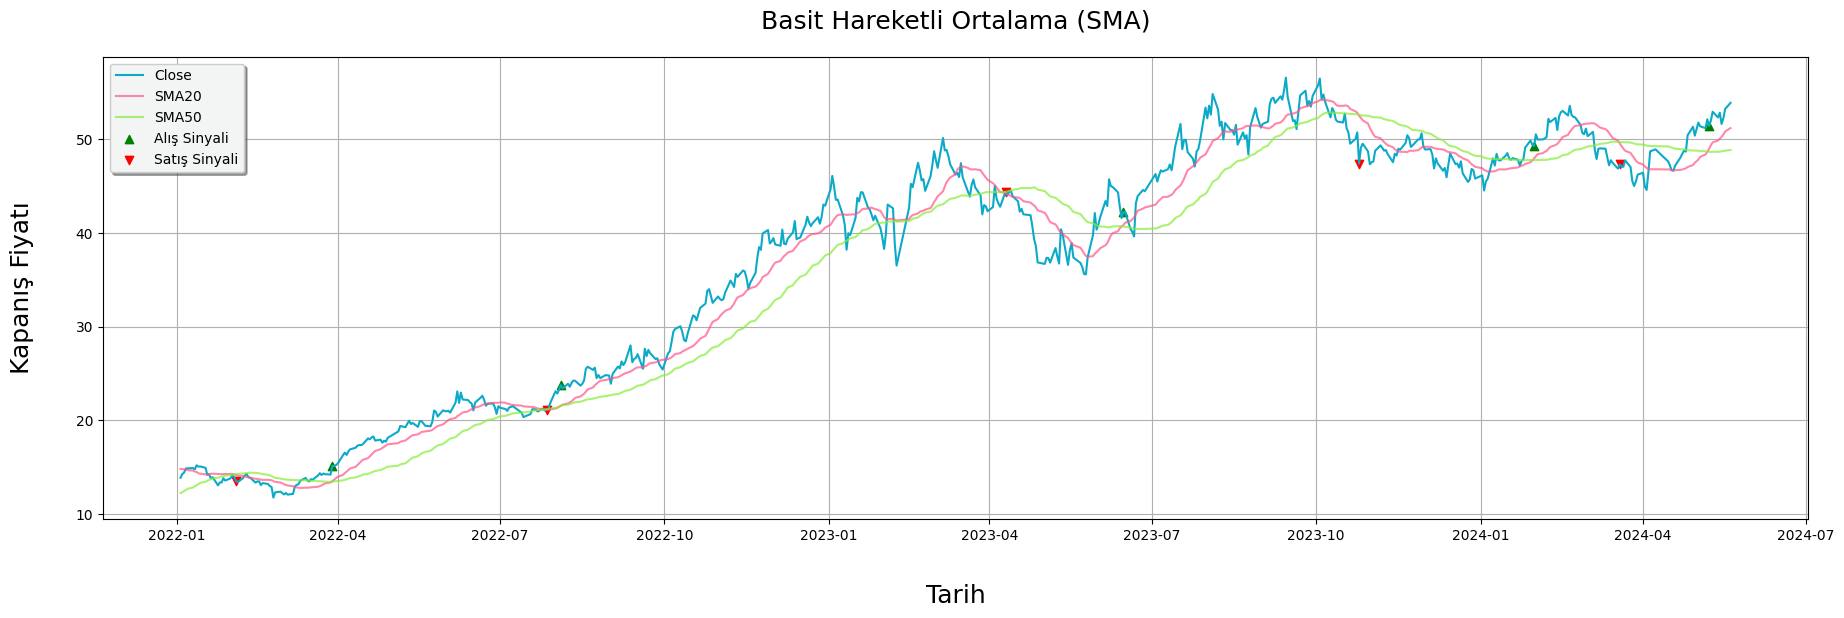

In [605]:
def simple_moving_average(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

# Hareketli ortalamaları hesapla
veri['SMA20'] = simple_moving_average(veri, period=20)
veri['SMA50'] = simple_moving_average(veri, period=50)

# Alış ve satış sinyallerini hesapla
veri['Signal'] = np.where(veri['SMA20'] > veri['SMA50'], 1, 0)
veri['Position'] = veri['Signal'].diff()

# Alış ve satış fiyatlarını işaretle
veri['Buy'] = np.where(veri['Position'] == 1, veri['Close'], np.nan)
veri['Sell'] = np.where(veri['Position'] == -1, veri['Close'], np.nan)

# 2022-01-01 tarihinden sonrasını seç
new_data = veri.loc["2022-01-01":]

# Grafiği çiz
plt.figure(figsize=(22, 6))
plt.plot(new_data['Close'], label='Close', color="#0caac9")
plt.plot(new_data['SMA20'], alpha=0.7, label='SMA20', color="#ff5487")
plt.plot(new_data['SMA50'], alpha=0.7, label='SMA50', color="#86ed37")
plt.scatter(new_data.index, new_data['Buy'], alpha=1, label='Alış Sinyali', marker='^', color='green')
plt.scatter(new_data.index, new_data['Sell'], alpha=1, label='Satış Sinyali', marker='v', color='red')
plt.title('Basit Hareketli Ortalama (SMA)', fontsize=18, pad=20)
plt.xlabel('Tarih', fontsize=18, labelpad=30)
plt.ylabel('Kapanış Fiyatı', fontsize=18, labelpad=30)
plt.legend(shadow=True, facecolor="#f2f5f3")
plt.grid()
plt.show()

# Bollinger Bantları


---

**Bollinger Bantları Nedir ?**

Bollinger Bantları, volatiliteyi ölçmek ve fiyatların aşırı alım veya aşırı satım seviyelerine ulaşıp ulaşmadığını belirlemek için kullanılır. Bantların daralması, piyasada düşük volatiliteyi gösterirken, genişlemesi yüksek volatiliteyi gösterir. Fiyatlar üst banttan çıktığında aşırı alım, alt banttan çıktığında ise aşırı satım sinyali olarak yorumlanabilir.

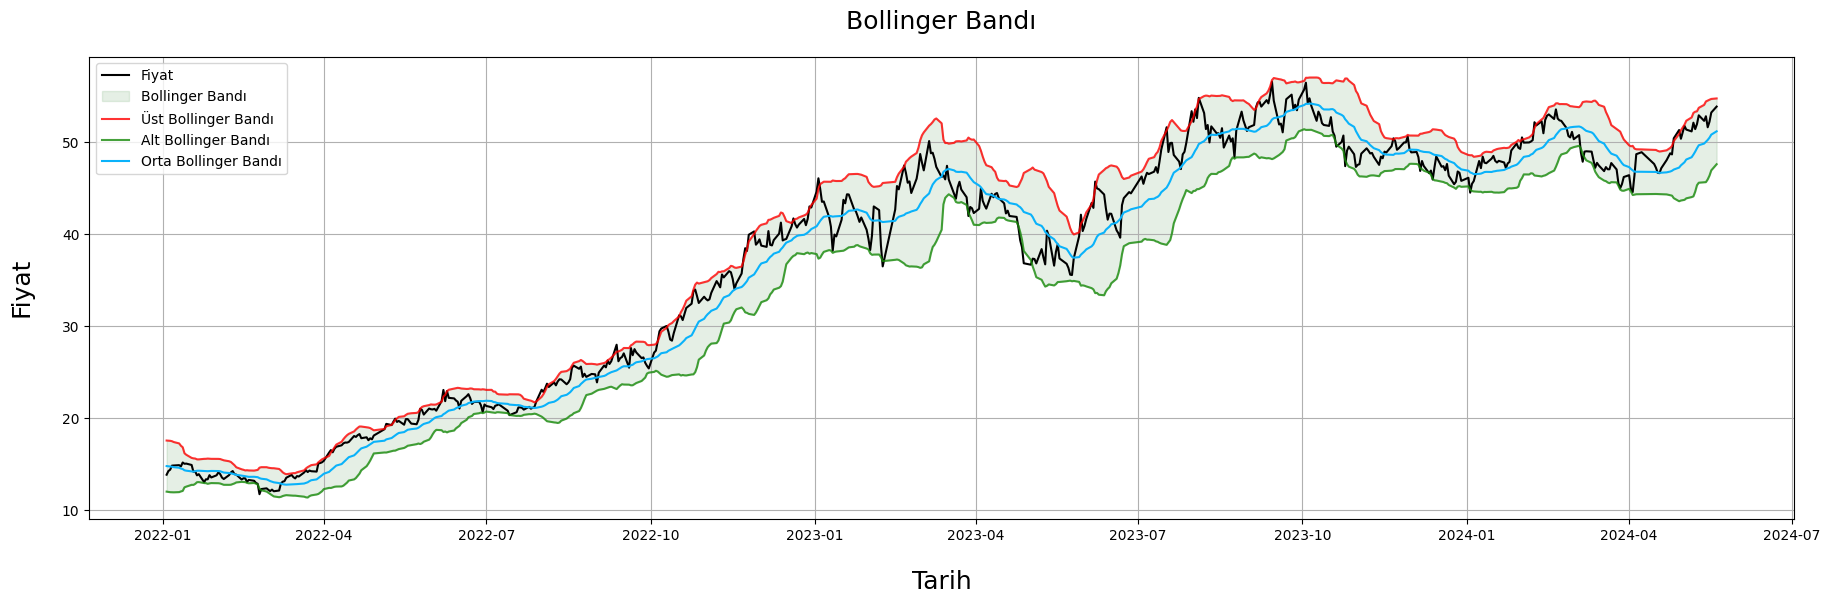

In [606]:
veri["SMA"] = veri["Close"].rolling(window=20).mean()
veri["SD"] = veri["Close"].rolling(window=20).std()
veri["UB"] = veri["SMA"] + (2*veri["SD"])
veri["LB"] = veri["SMA"] - (2*veri["SD"])
new_data = veri.loc["2022-01-01":]

plt.figure(figsize=(22, 6))
plt.plot(new_data.index, new_data["Close"], label="Fiyat", color="black")
plt.fill_between(new_data.index, new_data["UB"], new_data["LB"], color="darkgreen", alpha=0.1, label="Bollinger Bandı")
plt.plot(new_data.index, new_data["UB"], label="Üst Bollinger Bandı", color="red", alpha=0.8)
plt.plot(new_data.index, new_data["LB"], label="Alt Bollinger Bandı", color="#188a0b", alpha=0.8)
plt.plot(new_data.index, new_data["SMA"], label="Orta Bollinger Bandı", color="#0ab2fa")
plt.title("Bollinger Bandı", fontsize=18, pad=20)
plt.xlabel("Tarih", fontsize=18, labelpad=20)
plt.ylabel("Fiyat", fontsize=18, labelpad=20)
plt.legend()
plt.grid(True)

# Ichimoku Bulutu



---


**Ichimoku Bulutu Nedir ?**

Ichimoku Kinko Hyo bulutları, bir varlığın trendini belirlemek ve potansiyel alım-satım noktalarını tanımlamak için kullanılır. Bulutların inceltilmesi veya genişlemesi, varlığın momentumunu ve trendini gösterir. Bulutların kesişmeleri, potansiyel alım veya satım sinyalleri olarak yorumlanabilir. Ichimoku Kinko Hyo bulutları ayrıca stop-loss seviyelerini belirlemek için de kullanılabilir.

**Bullish ve Bearish Nedir ?**

<ul>

<li>

**Bullish:**  "Bullish" terimi, piyasanın yükseliş eğiliminde olduğunu ifade eder. Bu durumda, fiyatların genellikle arttığı veya artma olasılığının yüksek olduğu düşünülür. Yatırımcılar "bullish" olduğunda, genellikle fiyatların yükseleceğine inanarak alım yaparlar veya mevcut pozisyonlarını korurlar.
</li>
<li>

**Bearish:** "Bearish" terimi ise tam tersi durumu ifade eder. Piyasanın düşüş eğiliminde olduğu veya fiyatların genellikle düşeceği düşünülür. Yatırımcılar "bearish" olduğunda, fiyatların düşeceğine inanarak satış yapabilirler veya mevcut pozisyonlarını kapatıp bekleyebilirler.</li>

</ul>



In [607]:
# En yüksek ve en düşük değerlerin hareketli ortalamasını hesaplama
high9 = veri.High.rolling(9).max()
low9 = veri.High.rolling(9).min()

high26 = veri.High.rolling(26).max()
low26 = veri.High.rolling(26).min()

high52 = veri.High.rolling(52).max()
low52 = veri.High.rolling(52).min()

In [608]:
# Çizgileri Hesaplama
veri["tenkan_sen"] = (high9 + low9) / 2 # Tenkan Sen çizgisini hesapla
veri["kijun_sen"] = (high26 + low26) / 2 # Kijun Sen çizgisini hesapla
veri["senkou_A"] = ((veri.tenkan_sen + veri.kijun_sen) / 2).shift(26) # Senkou A çizgisini hesapla
veri["senkou_B"] = ((high52 + low52) / 2).shift(26) # Senkou B çizgisini hesapla
veri["chikou"] = veri.Close.shift(-26) # Chikou çizgisini hesapla
veri = veri.iloc[26:]
# 2022-01-01 tarihinden sonrasını seç
new_data = veri.loc["2022-01-01":]

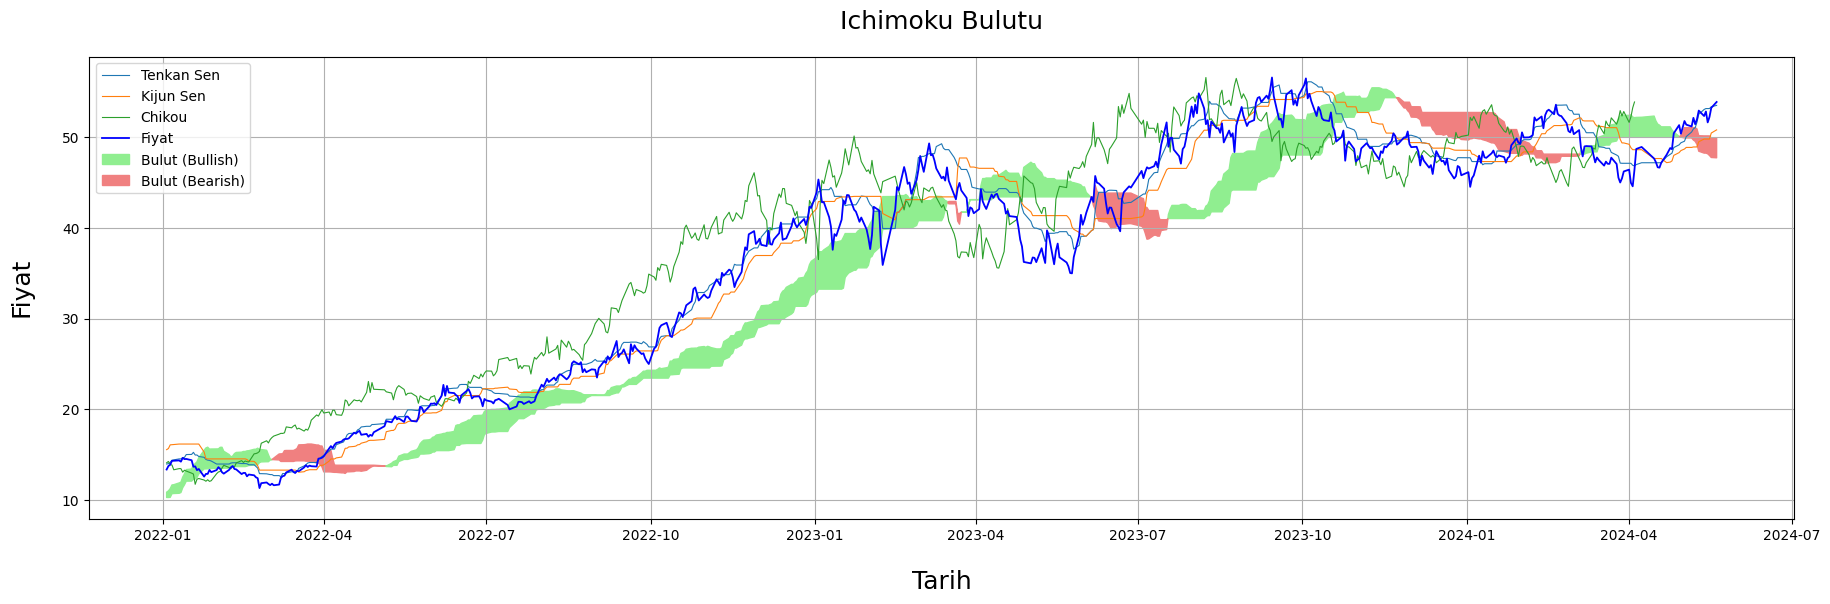

In [609]:
# Görselleştirme
fig, ax = plt.subplots(figsize=(22, 6))

# Tenkan Sen, Kijun Sen ve Chikou çizgilerini çiz
ax.plot(new_data.index, new_data["tenkan_sen"], lw=0.8, label="Tenkan Sen")
ax.plot(new_data.index, new_data["kijun_sen"], lw=0.8, label="Kijun Sen")
ax.plot(new_data.index, new_data["chikou"], lw=0.8, label="Chikou")

# Fiyat çizgisini çiz
ax.plot(new_data.index, new_data["Adj Close"], lw=1.3, color="b", label="Fiyat")

# Senkou A ve Senkou B arasını doldurarak bulutları çiz
ax.fill_between(new_data.index, new_data["senkou_A"], new_data["senkou_B"], where=new_data["senkou_A"] >= new_data["senkou_B"], color="lightgreen", label="Bulut (Bullish)", interpolate=True)
ax.fill_between(new_data.index, new_data["senkou_A"], new_data["senkou_B"], where=new_data["senkou_A"] < new_data["senkou_B"], color="lightcoral", label="Bulut (Bearish)", interpolate=True)

# Grafik başlığı ve eksen etiketleri
ax.set_title("Ichimoku Bulutu", fontsize=18, pad=20)
ax.set_ylabel("Fiyat", fontsize=18, labelpad=20)
ax.set_xlabel("Tarih", fontsize=18, labelpad=20)

# Grid ve legend
ax.grid()
ax.legend()

# Relative Strength Index (RSI)



---


**RSI(Relative Strength Index) Nedir?**

RSI (Relatif Güç Endeksi), teknik analizin temel göstergelerinden biridir ve piyasadaki fiyat momentumunu ölçmek için kullanılır. RSI, genellikle aşırı alım ve aşırı satım koşullarını belirlemek için kullanılır ve trader'ların piyasada olası dönüşler hakkında fikir edinmelerine yardımcı olur.


**RSI Nasıl Yorumlanır ?**



1.  **Aşırı Alım ve Aşırı Satım Sinyalleri:** RSI'nin 70'in üzerine çıkması genellikle aşırı alımı, 30'un altına düşmesi ise aşırı satımı gösterebilir. Bu durumlar, fiyatın kısa vadede tersine dönebileceğini ve bir düzeltme veya trend değişikliği olabileceğini işaret edebilir.

2.   **Diverjanslar:** RSI ile fiyat arasında pozitif veya negatif diverjanslar oluşabilir. Örneğin, fiyat yeni bir yüksek yaparken, RSI yeni bir yüksek yapmıyorsa, bu fiyatın güçlenmekte olduğuna dair bir uyarı olabilir.

3.  **Trendin Onaylanması:** RSI, bir fiyat trendinin devam edip etmediğini teyit etmek için kullanılabilir. Özellikle bir yükseliş trendinde, fiyatlar yükselirken RSI'nin 50'nin üzerinde kalması, yükseliş trendinin güçlü olduğunu gösterebilir.

4.    **Destek ve Direnç Seviyeleri:** RSI, destek ve direnç seviyelerini belirlemek için de kullanılabilir. Özellikle RSI'nin belirli bir seviyede bir süre kaldığında bu seviye destek veya direnç olarak işlev görebilir.



In [610]:
# RSI hesaplama
delta = veri["Adj Close"].diff(1)
delta.dropna(inplace=True)

positive = delta.copy()
negative = delta.copy()

positive[positive < 0] = 0
negative[negative > 0] = 0

days = 14

average_gain = positive.rolling(window=days).mean()
average_loss = abs(negative.rolling(window=days).mean())

relative_strength = (average_gain / average_loss)

RSI = 100.0 - (100.0 / (1.0 + relative_strength))

combined = pd.DataFrame()
combined["Adj Close"] = veri["Adj Close"]
combined["RSI"] = RSI

# 2022-01-01 tarihinden sonrasını seç
new_data = combined.loc["2022-01-01":]

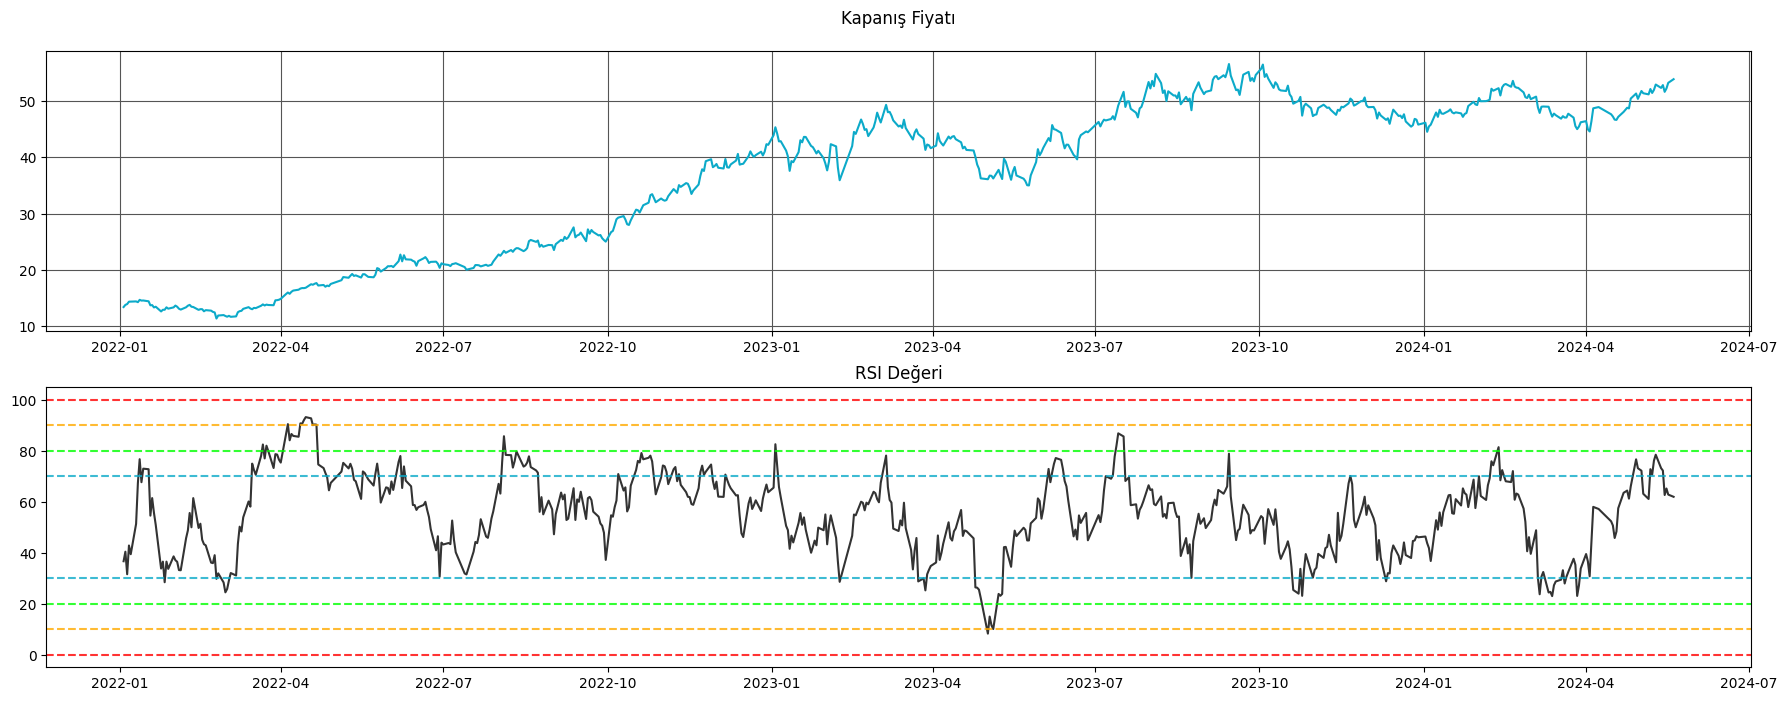

In [611]:
# Görselleştirme
plt.figure(figsize=(22, 8))

# Kapanış fiyatı
ax1 = plt.subplot(211)
ax1.plot(new_data.index, new_data["Adj Close"], color="#0caac9")
ax1.set_title("Kapanış Fiyatı", pad=20)
ax1.grid(True, color="#555555")
ax1.set_axisbelow(True)

# RSI değeri
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(new_data.index, new_data["RSI"], color="black", alpha=0.8)
ax2.axhline(0, linestyle="--", alpha=0.8, color="#ff0000")
ax2.axhline(10, linestyle="--", alpha=0.8, color="#ffaa00")
ax2.axhline(20, linestyle="--", alpha=0.8, color="#00ff00")
ax2.axhline(30, linestyle="--", alpha=0.8, color="#0caac9")
ax2.axhline(70, linestyle="--", alpha=0.8, color="#0caac9")
ax2.axhline(80, linestyle="--", alpha=0.8, color="#00ff00")
ax2.axhline(90, linestyle="--", alpha=0.8, color="#ffaa00")
ax2.axhline(100, linestyle="--", alpha=0.8, color="#ff0000")

ax2.set_title("RSI Değeri")
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor("white")

# Moving Average Convergence Divergence (MACD)



---



**MACD Nedir ?**


MACD (Moving Average Convergence Divergence), teknik analizde sıkça kullanılan bir momentum göstergesidir. MACD'nin yorumlanması ve kullanımı, trendin gücünü değerlendirmek, trend değişimlerini tanımlamak ve alım/satım sinyalleri üretmek gibi çeşitli amaçlarla yapılır.




1.  **MACD Çizgisi:** MACD çizgisi, hızlı üssel hareketli ortalama (EMA) ile yavaş EMA arasındaki farkı temsil eder. Genellikle, 12 periyotluk bir hızlı EMA ve 26 periyotluk bir yavaş EMA kullanılarak hesaplanır. Bu çizgi, fiyat hareketlerinin momentumunu ölçer. Pozitif bir MACD değeri, hızlı EMA'nın yavaş EMA'nın üstünde olduğunu ve yükseliş momentumunu gösterir. Negatif bir MACD değeri ise hızlı EMA'nın yavaş EMA'nın altında olduğunu ve düşüş momentumunu gösterir.

2.  **Signal Line (Sinyal Hattı):** Sinyal hattı, MACD çizgisinin 9 periyotluk üssel hareketli ortalamasıdır. Yani, MACD çizgisinin daha pürüzsüz bir versiyonudur. Sinyal hattı, MACD çizgisinin daha düzeltilmiş bir versiyonunu oluşturur ve trend değişimlerini daha net gösterir. MACD çizgisi ile sinyal hattı arasındaki kesişimler, alım ve satım sinyalleri üretmek için kullanılır. Örneğin, MACD çizgisi sinyal hattını yukarıdan aşağıya kestiğinde, bu bir satış sinyali olarak yorumlanabilir. Tam tersi durumda, yani MACD çizgisi sinyal hattını aşağıdan yukarıya kestiğinde, bu bir alış sinyali olarak yorumlanabilir.

In [612]:
macd_veri = veri['Adj Close']
def MACD(veri, hizli_periyot=12, yavas_periyot=26, sinyal_periyot=9):
    hizli_ema = veri.ewm(span=hizli_periyot, adjust=False).mean()
    yavas_ema = veri.ewm(span=yavas_periyot, adjust=False).mean()
    macd = hizli_ema - yavas_ema
    signal_line = macd.ewm(span=sinyal_periyot, adjust=False).mean()
    histogram = macd - signal_line
    return macd, signal_line, histogram

macd, signal_line, histogram = MACD(macd_veri)

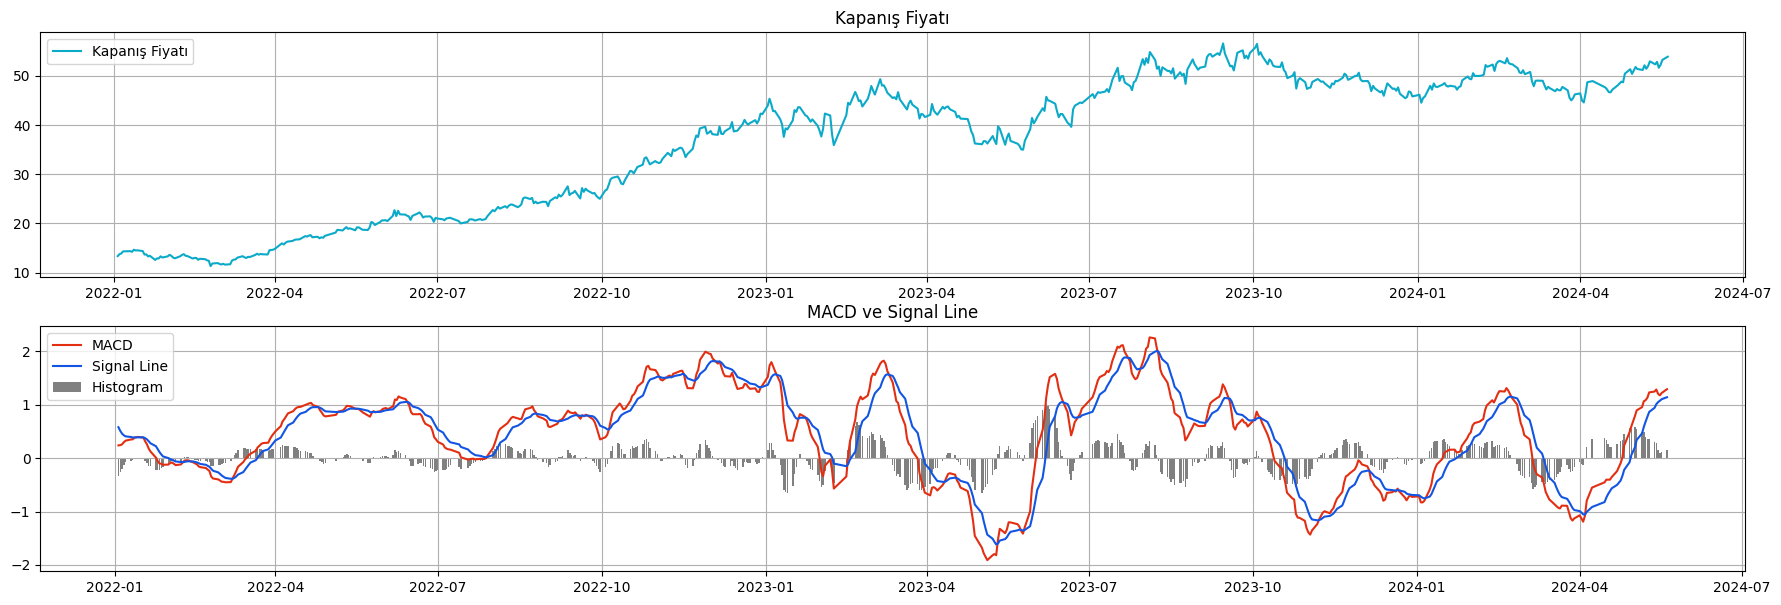

In [613]:
new_data = pd.concat([macd, signal_line, histogram], axis=1).loc["2022-01-01":]

plt.figure(figsize=(22, 7))

plt.subplot(2, 1, 1)
plt.plot(new_data.index, macd_veri.loc["2022-01-01":], label='Kapanış Fiyatı', color='#0caac9')
plt.title('Kapanış Fiyatı')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(new_data.index, macd.loc["2022-01-01":], label='MACD', color='#e32e12')
plt.plot(new_data.index, signal_line.loc["2022-01-01":], label='Signal Line', color='#1255e3')
plt.bar(new_data.index, histogram.loc["2022-01-01":], label='Histogram', color='gray')
plt.title('MACD ve Signal Line')
plt.legend()
plt.grid()

# Tahmin Modelinin Yazılması

In [614]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

# Ölçeklendirme

In [615]:
x = veri[["Open","Low","High","Volume"]].values
y = veri["Close"].values

In [616]:
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x.reshape(-1, x.shape[-1])).reshape(x.shape)

# Veriyi Eğitim ve Test Olarak Ayırma

In [617]:
from sklearn.model_selection import train_test_split

# Verileri train ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

# Model Eğitimi

In [618]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Modeli derleme
model.compile(loss='mse', optimizer='adam')

# Verileri LSTM modeline uygun hale getirme
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Modeli eğitme
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/100
53/53 [==============================] - 7s 28ms/step - loss: 299.9730 - val_loss: 231.6463
Epoch 2/100
53/53 [==============================] - 1s 10ms/step - loss: 163.8874 - val_loss: 171.4715
Epoch 3/100
53/53 [==============================] - 1s 10ms/step - loss: 131.5093 - val_loss: 145.3456
Epoch 4/100
53/53 [==============================] - 0s 9ms/step - loss: 112.1238 - val_loss: 124.5543
Epoch 5/100
53/53 [==============================] - 1s 9ms/step - loss: 94.8995 - val_loss: 105.6376
Epoch 6/100
53/53 [==============================] - 1s 10ms/step - loss: 81.7532 - val_loss: 90.0043
Epoch 7/100
53/53 [==============================] - 0s 9ms/step - loss: 69.9209 - val_loss: 76.1990
Epoch 8/100
53/53 [==============================] - 1s 9ms/step - loss: 58.0989 - val_loss: 64.8167
Epoch 9/100
53/53 [==============================] - 1s 10ms/step - loss: 49.7735 - val_loss: 55.0510
Epoch 10/100
53/53 [==============================] - 1s 10ms/step - loss: 42

In [619]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 4, 50)             10400     
                                                                 
 dropout_44 (Dropout)        (None, 4, 50)             0         
                                                                 
 lstm_45 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_45 (Dropout)        (None, 50)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Tahminler

In [620]:
# Model üzerinde tahminde bulunma
tahminler = model.predict(X_test_reshaped)

tahmin_df = pd.DataFrame(y_test,columns=["Gerçek degerler"])
tahmin_df["Model Tahmini"] = tahminler

17/17 [==============================] - 1s 4ms/step


In [621]:
tahmin_df

,Gerçek degerler,Model Tahmini
0,4.850000,4.559617
1,4.190000,4.056983
2,3.065334,3.009478
3,2.906444,2.922590
4,2.381334,2.438520
...,...,...
522,2.651556,2.680931
523,2.474223,2.512170
524,1.920112,2.044697
525,2.727556,2.787574


# Yıl Sonu Fiyat Tahmini

In [622]:
# Son 90 günlük veri
son_90_gun_veri = veri.iloc[-90:][["Open", "Low", "High", "Volume"]].values

son_90_gun_veri_normalized = scaler.transform(son_90_gun_veri)
son_veri = son_90_gun_veri[-1].reshape(1, -1)
son_veri_normalized = scaler.transform(son_veri.reshape(1, -1)).reshape(son_veri.shape[0], son_veri.shape[1], 1)

tahmin_2024_12_31 = model.predict(son_veri_normalized)

print("2024-12-31 için tahmin edilen kapanış fiyatı:", tahmin_2024_12_31[0][0])

1/1 [==============================] - 0s 33ms/step
2024-12-31 için tahmin edilen kapanış fiyatı: 52.18462


# MAE

In [623]:
mae = mean_absolute_error(y_test, tahminler)

In [624]:
mae

0.2607318952368604

# R-2 Score

In [625]:
r2 = r2_score(y_test, tahminler)

In [626]:
r2

0.998881135285248

# Model Kaybı

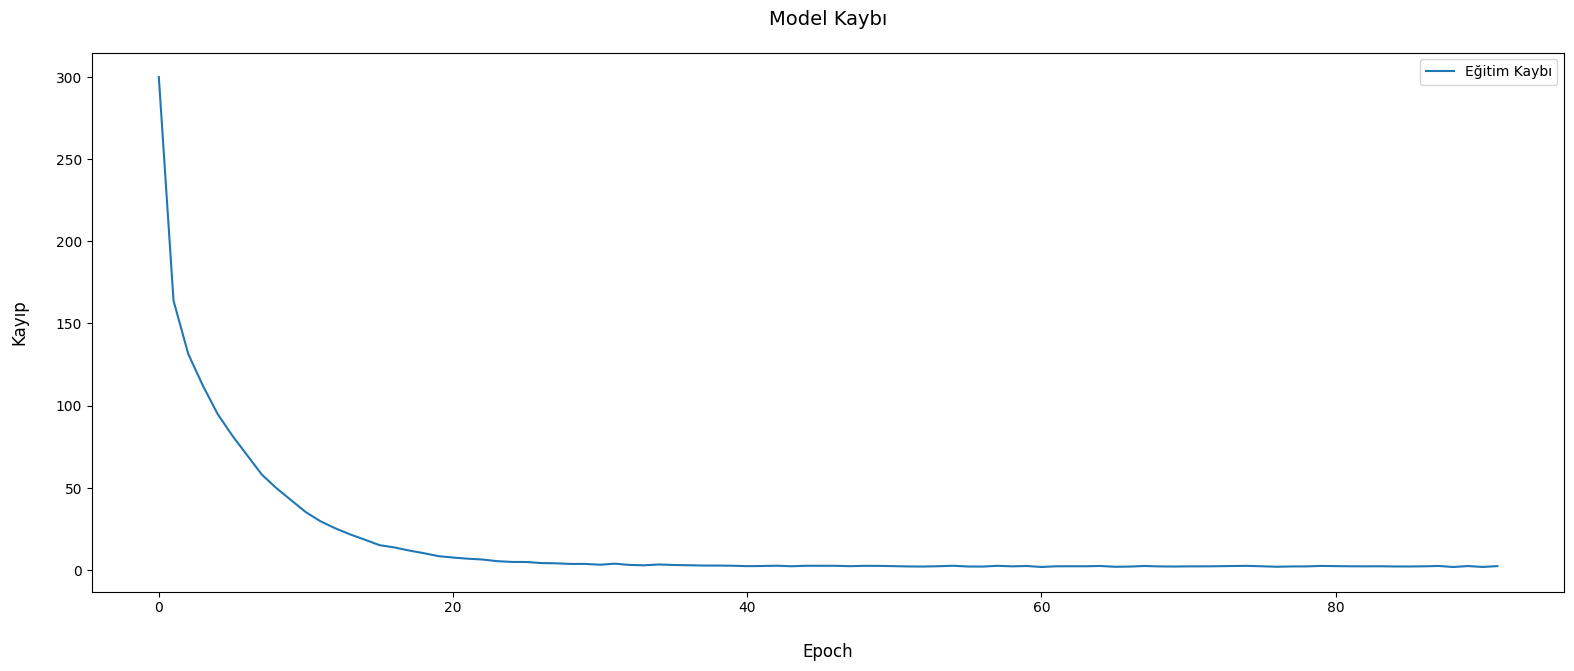

In [627]:
plt.figure(figsize=(19, 7))

train_loss = history.history['loss']

plt.plot(train_loss, label='Eğitim Kaybı')
plt.xlabel('Epoch', labelpad=20,fontsize=12)
plt.ylabel('Kayıp', labelpad=20,fontsize=12)
plt.title("Model Kaybı", pad=20, fontsize=14)
plt.legend()

# Gerçek ve Tahmin Edilen Değer Karşılaştırması

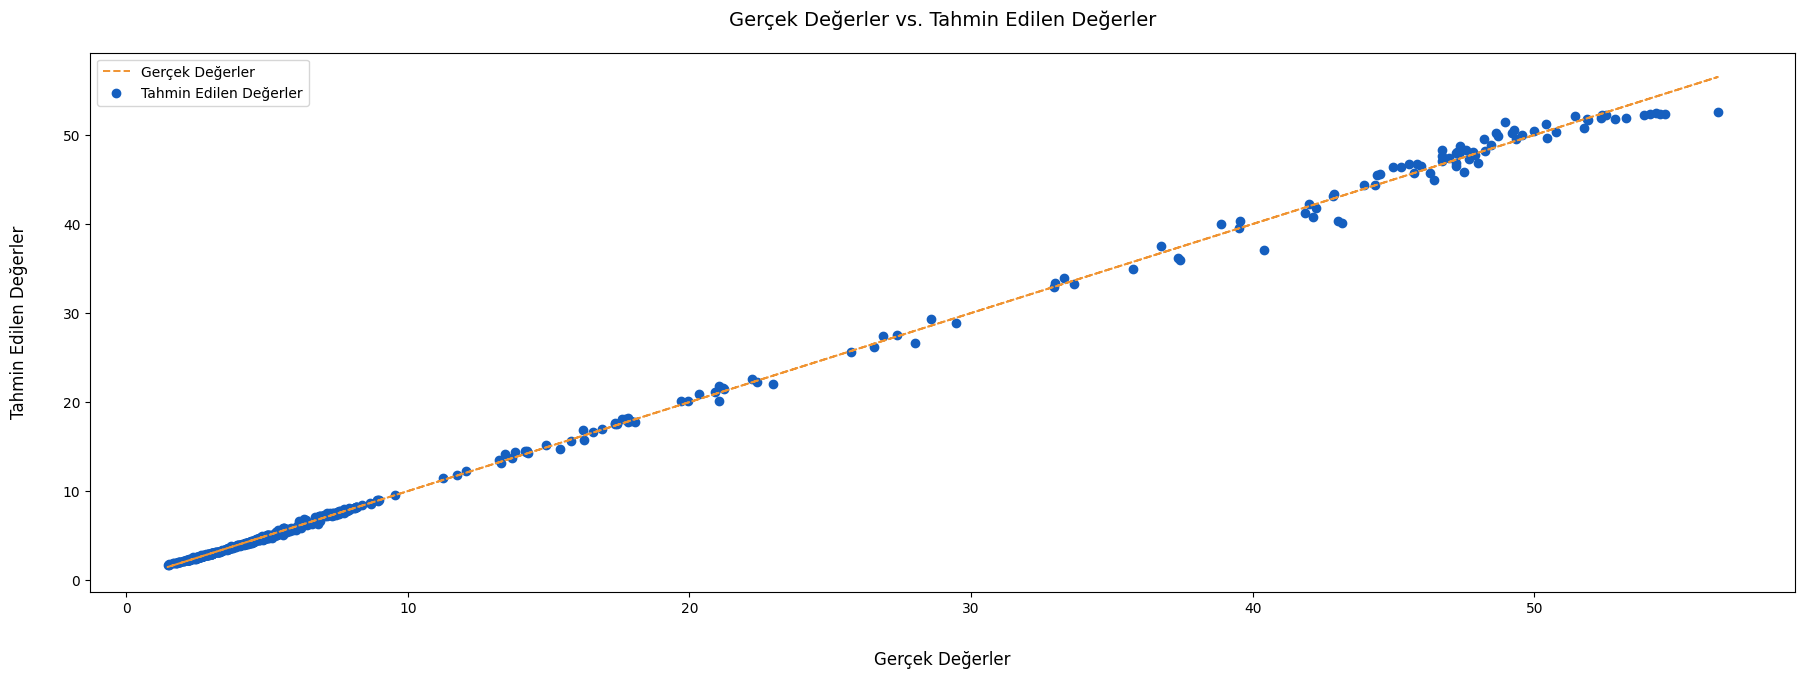

In [628]:
plt.figure(figsize=(22, 7))
plt.plot(y_test, y_test, color="#f09432", linestyle="--", lw=1.4, label='Gerçek Değerler')
plt.scatter(y_test, tahminler, color="#155fbf", label='Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler',labelpad=25, fontsize=12)
plt.ylabel('Tahmin Edilen Değerler',labelpad=25, fontsize=12)
plt.title('Gerçek Değerler vs. Tahmin Edilen Değerler', pad =20, fontsize=14)
plt.legend()

# Modelin Gerçek Verilerle Karşılaştırılması

In [629]:
scaler2 = StandardScaler()
scaler2.fit(x)
scaled_data = scaler2.transform(x)
scaled_data_reshaped = scaled_data.reshape((scaled_data.shape[0], scaled_data.shape[1], 1))
tahmin_dizisi = model.predict(scaled_data_reshaped)

veri["Tahminler"] = tahmin_dizisi

83/83 [==============================] - 0s 5ms/step


<ipython-input-629-1f6352103db5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri["Tahminler"] = tahmin_dizisi


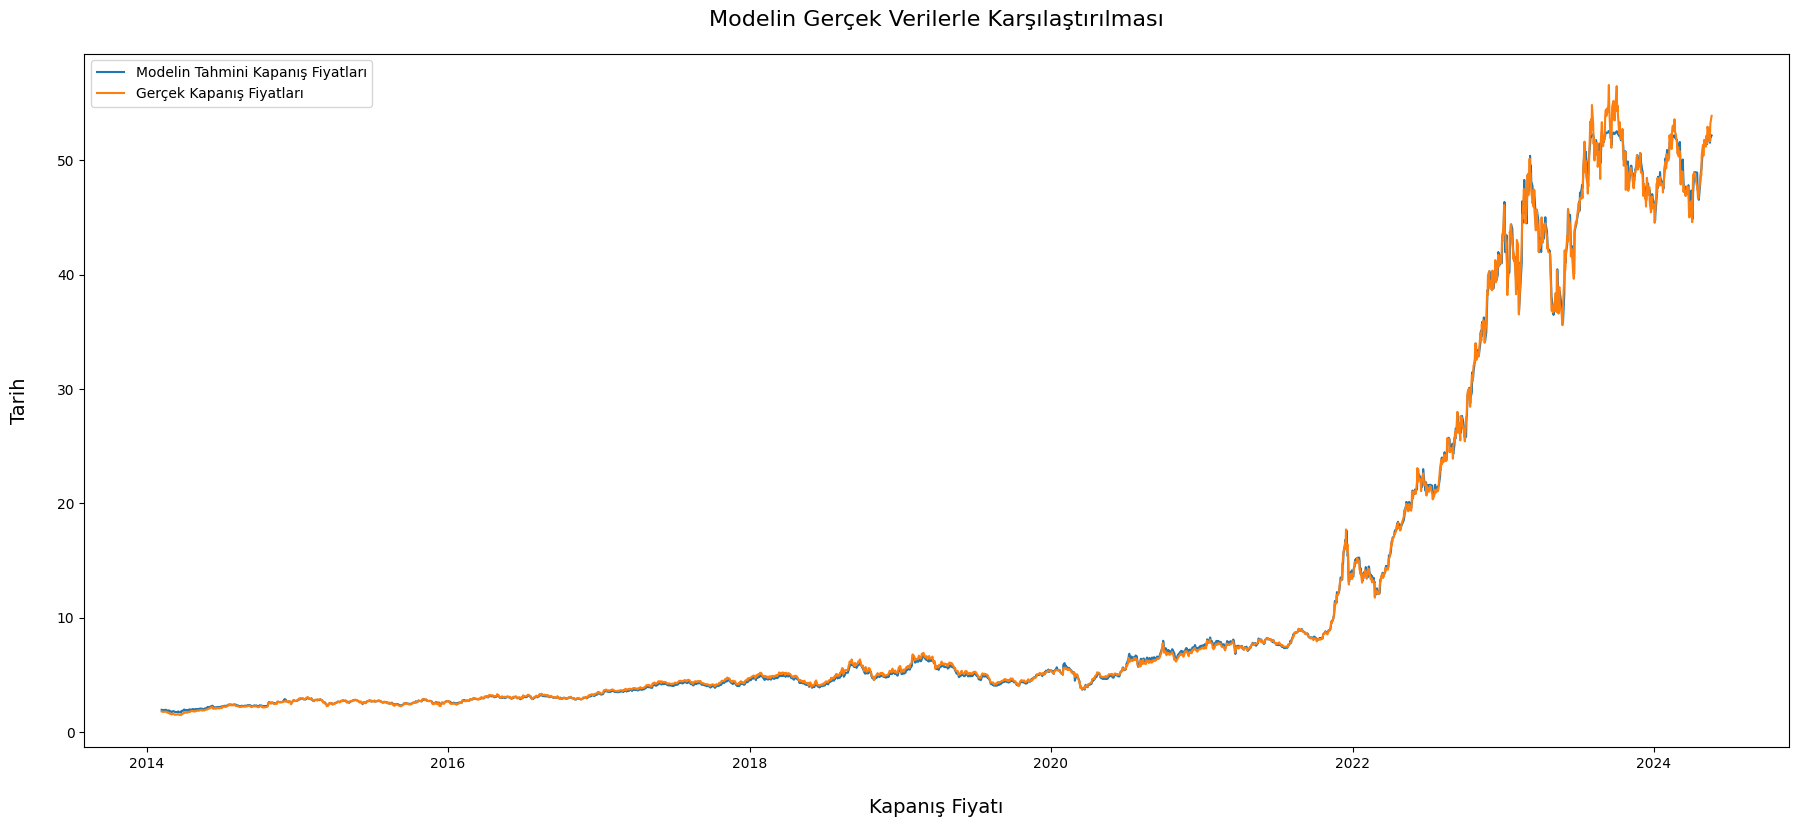

In [630]:
plt.figure(figsize=(22,9))
plt.plot(veri["Tahminler"],label="Modelin Tahmini Kapanış Fiyatları")
plt.plot(veri["Close"],label = "Gerçek Kapanış Fiyatları")
plt.title("Modelin Gerçek Verilerle Karşılaştırılması", pad = 20, fontsize=16)
plt.xlabel("Kapanış Fiyatı", labelpad=20, fontsize=14)
plt.ylabel("Tarih", labelpad=20, fontsize=14)
plt.legend()

# Korelasyon


---


**Korelasyon Nedir ?**

Korelasyon, iki veya daha fazla finansal varlık arasındaki ilişkiyi ifade eder. Pozitif korelasyon, varlıkların fiyatlarının aynı yönde hareket ettiği anlamına gelirken, negatif korelasyon ise varlıkların fiyatlarının zıt yönde hareket ettiğini ifade eder.

<br>

**Ters Korelasyon Nedir ?**

Ters korelasyon, varlıkların fiyatlarının birbirine zıt yönde hareket ettiği durumu ifade eder. Bir varlık değeri yükselirken diğeri düşer.

<br>

**Riskler Nedir ?**


1.  **Korelasyon Riski:** Korele hisselerde, tüm varlıkların aynı yönde hareket etme eğilimi olduğundan, portföyünüzü çeşitlendirmek zorlaşabilir. Özellikle kriz dönemlerinde, korelasyonun yüksek olması portföydeki riski artırabilir.


2. **Ters Korelasyon Riski:** Ters korelasyon, genellikle belirli bir durumda koruyucu olabilirken, diğer durumlarda risklerin artmasına neden olabilir. Örneğin, döviz kuru artışı, ihracat yapan bir şirketin hisselerini koruyabilirken, ithalat yapan bir şirket için risk oluşturabilir.


3. **Yatırım Riski:** Herhangi bir hisse senedi yatırımı gibi, korele veya ters korele hisse senetlerine yatırım yapmak da piyasa riski taşır. Piyasadaki genel koşullar, sektördeki gelişmeler ve şirket performansı gibi faktörler, yatırımlarınızın değerini etkileyebilir.


In [631]:
import json

with open("koreleHisseler.json", "r") as json_file:
    hisseler = json.load(json_file)

hisse_isimler = [hisse + ".IS" for hisse in hisseler]

In [632]:
koreleHisseler = yf.download(hisse_isimler, start="2022-04-24")["Adj Close"]

[*********************100%%**********************]  50 of 50 completed


In [633]:
koreleHisseler.fillna(koreleHisseler.mean(), inplace=True)

In [634]:
koreleHisseler

Ticker,AKBNK.IS,ALARK.IS,ALFAS.IS,ARCLK.IS,ASELS.IS,ASTOR.IS,BIMAS.IS,BRSAN.IS,CIMSA.IS,CWENE.IS,...,TAVHL.IS,TCELL.IS,THYAO.IS,TOASO.IS,TTKOM.IS,TUPRS.IS,ULKER.IS,VESTL.IS,YKBNK.IS,ZOREN.IS
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-25,8.137775,25.660940,77.217386,67.089798,13.408431,90.234040,82.444580,28.500000,4.488152,280.868701,...,42.040001,21.859840,39.599998,73.005249,11.468696,30.904751,17.170000,27.760000,4.507229,1.259409
2022-04-26,7.850868,25.194729,77.217386,66.254250,12.713179,90.234040,78.550301,27.600000,4.418527,280.868701,...,41.660000,22.068752,39.099998,69.955887,11.096452,29.189144,16.590000,26.520000,4.340295,1.210970
2022-04-27,7.955197,25.544386,77.217386,67.237251,12.484739,90.234040,80.687408,27.500000,4.405138,280.868701,...,42.840000,21.859840,40.500000,70.314636,11.034410,29.248714,16.610001,26.139999,4.349081,1.210970
2022-04-28,7.798702,24.864498,77.217386,65.959343,12.296028,90.234040,79.737587,27.780001,4.429239,280.868701,...,42.980000,21.935808,40.500000,69.955887,10.300000,28.355169,16.549999,26.440001,4.313937,1.229135
2022-04-29,7.755231,26.088299,77.217386,66.205093,12.166910,90.234040,79.357658,28.040001,4.466730,280.868701,...,42.860001,20.549389,41.259998,70.538857,10.080000,27.902439,16.709999,26.139999,4.278792,1.253354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-14,57.500000,117.099998,88.400002,185.600006,60.849998,104.400002,455.750000,545.500000,31.940001,253.750000,...,223.600006,83.099998,310.250000,272.750000,41.020000,183.600006,116.800003,99.500000,31.860001,5.930000
2024-05-15,57.200001,115.400002,88.400002,185.000000,59.950001,101.300003,469.250000,543.500000,31.660000,256.000000,...,221.500000,82.800003,305.500000,274.250000,41.040001,181.500000,122.199997,97.800003,31.980000,5.850000
2024-05-16,59.150002,114.800003,89.250000,187.800003,60.700001,102.900002,466.750000,547.000000,32.580002,260.500000,...,230.000000,84.750000,307.000000,286.750000,41.860001,180.800003,128.899994,95.800003,32.520000,6.070000


# Korelasyon Hesaplama

In [635]:
korelasyonlar = koreleHisseler.corr()

korele_hisseler = []
ters_korele_hisseler = []

for i in range(len(korelasyonlar.columns)):
    for j in range(i+1, len(korelasyonlar.columns)):
        if korelasyonlar.iloc[i, j] > 0.9:
            korele_hisse = (korelasyonlar.columns[i], korelasyonlar.columns[j])
            if (korele_hisse[1], korele_hisse[0]) not in korele_hisseler:
                korele_hisseler.append(korele_hisse)
        elif korelasyonlar.iloc[i, j] < -0.8:
            ters_korele_hisse = (korelasyonlar.columns[i], korelasyonlar.columns[j])
            if (ters_korele_hisse[1], ters_korele_hisse[0]) not in ters_korele_hisseler:
                ters_korele_hisseler.append(ters_korele_hisse)

# İlişkileri Kaydetme

In [636]:
# Korele ve ters korele olan hisseleri birleştir
tum_hisseler = [{"hisse1": hisse[0], "hisse2": hisse[1], "iliski": "Korele"} for hisse in korele_hisseler] + \
               [{"hisse1": hisse[0], "hisse2": hisse[1], "iliski": "Ters Korele"} for hisse in ters_korele_hisseler]

# JSON dosyasına yaz
with open("hisse_iliskileri.json", "w") as json_file:
    json.dump({"hisse_iliskileri": tum_hisseler}, json_file, indent=4)
